<a href="https://colab.research.google.com/github/MeikoFudo/CoursePaper/blob/main/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec
rcParams['figure.figsize'] = 11.7,8.27

In [8]:
import tensorflow as tf

if tf.test.is_gpu_available():
    print("GPU доступен!")
else:
    print("GPU недоступен")

with tf.device("/GPU:0"):
    pass


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU доступен!


In [9]:
import pandas as pd
import ssl


class CryptoData:
    def __init__(self, url: str):
        ssl._create_default_https_context = ssl._create_unverified_context
        self.df = pd.read_csv(url, delimiter=",", skiprows=[0])
    
    def get_dataframe(self) -> pd.DataFrame:
        return self.df

In [10]:
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
crypto_data = CryptoData(url)
df = crypto_data.get_dataframe()

In [11]:
df

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1682726400000,2023-04-29,BTCUSDT,29311.69,29448.88,29031.00,29230.45,20466.830580,5.994669e+08,619319
1,1682640000000,2023-04-28,BTCUSDT,29472.77,29599.54,28891.00,29311.70,54298.165780,1.590684e+09,1129240
2,1682553600000,2023-04-27,BTCUSDT,28415.29,29890.00,28378.86,29472.77,95430.824310,2.784860e+09,1990148
3,1682467200000,2023-04-26,BTCUSDT,28300.80,30036.00,27235.00,28415.29,129228.404030,3.719701e+09,2261942
4,1682380800000,2023-04-25,BTCUSDT,27510.93,28399.99,27192.00,28300.79,52325.146370,1.446329e+09,1087067
...,...,...,...,...,...,...,...,...,...,...
2077,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
2078,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2079,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2080,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2082 entries, 0 to 2081
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unix         2082 non-null   int64  
 1   Date         2082 non-null   object 
 2   Symbol       2082 non-null   object 
 3   Open         2082 non-null   float64
 4   High         2082 non-null   float64
 5   Low          2082 non-null   float64
 6   Close        2082 non-null   float64
 7   Volume BTC   2082 non-null   float64
 8   Volume USDT  2082 non-null   float64
 9   tradecount   2082 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 162.8+ KB


In [13]:
df.describe()

,Unix,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
count,2.082000e+03,2082.000000,2082.000000,2082.000000,2082.000000,2082.000000,2.082000e+03,2.082000e+03
mean,1.592827e+12,19695.744217,20240.300130,19082.012507,19707.807478,77645.269434,1.684736e+09,1.489038e+06
std,5.194074e+10,16311.731570,16759.013308,15794.394061,16309.622034,88243.903671,2.152893e+09,2.098140e+06
min,1.502928e+12,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03
25%,1.547878e+12,7468.102500,7686.830000,7273.000000,7466.312500,31398.741049,2.582517e+08,2.691308e+05
50%,1.592827e+12,11175.055000,11541.900000,10829.500000,11183.620000,48705.988441,6.647730e+08,7.237725e+05
75%,1.637777e+12,29524.797500,30405.847500,28847.302500,29524.805000,82949.871658,2.487424e+09,1.641100e+06
max,1.682726e+12,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07


In [14]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [15]:
print('NA values:',df.isnull().values.any())

NA values: False


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df = df.sort_values(by='Date')
df

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
2081,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2080,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2079,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2078,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2077,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...
4,1682380800000,2023-04-25,BTCUSDT,27510.93,28399.99,27192.00,28300.79,52325.146370,1.446329e+09,1087067
3,1682467200000,2023-04-26,BTCUSDT,28300.80,30036.00,27235.00,28415.29,129228.404030,3.719701e+09,2261942
2,1682553600000,2023-04-27,BTCUSDT,28415.29,29890.00,28378.86,29472.77,95430.824310,2.784860e+09,1990148
1,1682640000000,2023-04-28,BTCUSDT,29472.77,29599.54,28891.00,29311.70,54298.165780,1.590684e+09,1129240


In [18]:
df.reset_index(inplace=True)
df

,index,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,2081,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
1,2080,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2,2079,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
3,2078,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
4,2077,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...,...
2077,4,1682380800000,2023-04-25,BTCUSDT,27510.93,28399.99,27192.00,28300.79,52325.146370,1.446329e+09,1087067
2078,3,1682467200000,2023-04-26,BTCUSDT,28300.80,30036.00,27235.00,28415.29,129228.404030,3.719701e+09,2261942
2079,2,1682553600000,2023-04-27,BTCUSDT,28415.29,29890.00,28378.86,29472.77,95430.824310,2.784860e+09,1990148
2080,1,1682640000000,2023-04-28,BTCUSDT,29472.77,29599.54,28891.00,29311.70,54298.165780,1.590684e+09,1129240


In [19]:
from pylab import rcParams
import seaborn as sns

In [20]:
df.drop('index', axis=1)
df.drop('Unix', axis=1)

,index,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,2081,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
1,2080,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2,2079,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
3,2078,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
4,2077,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...
2077,4,2023-04-25,BTCUSDT,27510.93,28399.99,27192.00,28300.79,52325.146370,1.446329e+09,1087067
2078,3,2023-04-26,BTCUSDT,28300.80,30036.00,27235.00,28415.29,129228.404030,3.719701e+09,2261942
2079,2,2023-04-27,BTCUSDT,28415.29,29890.00,28378.86,29472.77,95430.824310,2.784860e+09,1990148
2080,1,2023-04-28,BTCUSDT,29472.77,29599.54,28891.00,29311.70,54298.165780,1.590684e+09,1129240


In [21]:
class BitcoinVisualizer:
    def __init__(self, df):
        self.df = df
        
    def plot_bitcoin_prices(self):
        sns.set_style("darkgrid")
        sns.despine(left=True, bottom=True)
        sns.lineplot(x=df['Date'], y=df['Close'])
        plt.title('Bitcoin Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.show()

    def plot_bitcoin_scatter(prices_df):
        sns.set_style("darkgrid")
        sns.lineplot(x=df['Date'], y=df['Close'])
        plt.title('Bitcoin Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.scatter(df['Date'], df['Close'])
        plt.xlabel('Дата')
        plt.ylabel('Котировки акций')
        plt.title('Диаграмма рассеивания котировок акций биткоина')
        plt.show()

    def plot_bitcoin_distribution(self):
        sns.histplot(df['Close'], bins=20)
        sns.set_style("darkgrid")
        sns.set_palette("husl")
        sns.despine(left=True)
        plt.title('Распределение цен на биткоин')
        plt.xlabel('Цена (USD)')
        plt.ylabel('Количество')
        plt.show()

    def plot_bitcoin_boxplot(self, nrows, ncols):
        data_new = self.df.drop(['Date', 'Volume BTC','Volume USDT', 'Symbol'], axis=1)
        fig = plt.figure(figsize=(24, 12))
        spec = GridSpec(ncols=ncols, nrows=nrows, figure=fig, top=1.3)
        my_id = 0
        for i in range(nrows):
            for j in range(ncols):
                if i == nrows-1:
                    ax = fig.add_subplot(spec[i, :])
                    sns.boxplot(data_new.iloc[:, my_id])
                    ax.set_title(data_new.columns[my_id])
                    break
                ax = fig.add_subplot(spec[i, j])
                sns.boxplot(data_new.iloc[:, my_id])
                ax.set_title(data_new.columns[my_id])
                my_id += 1
        plt.show()

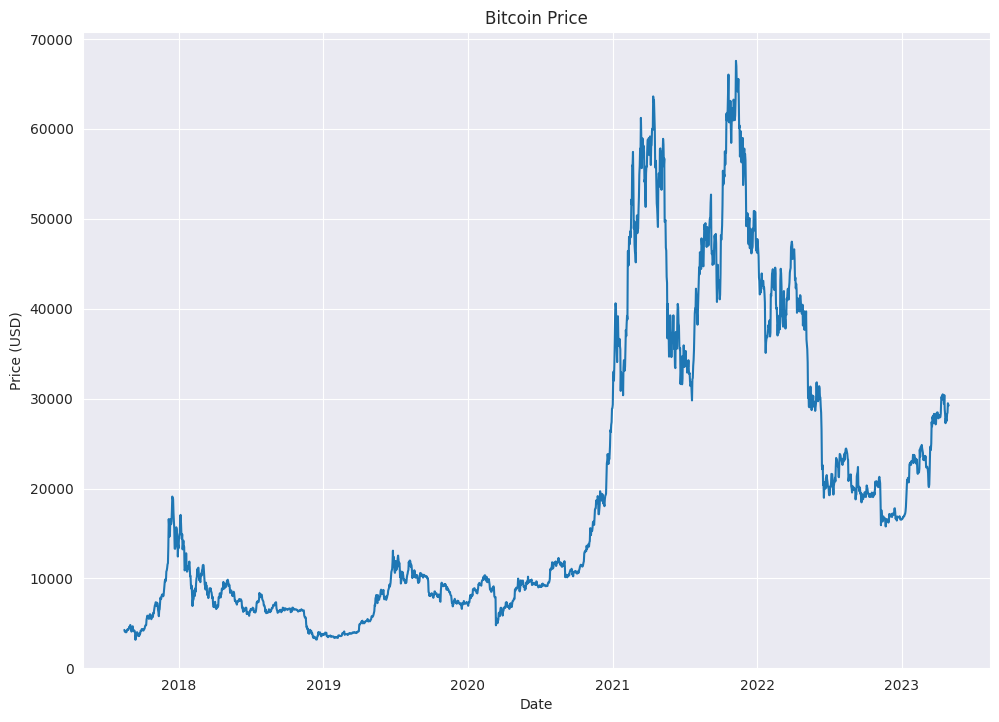

In [22]:
visualizer = BitcoinVisualizer(df)
visualizer.plot_bitcoin_prices()

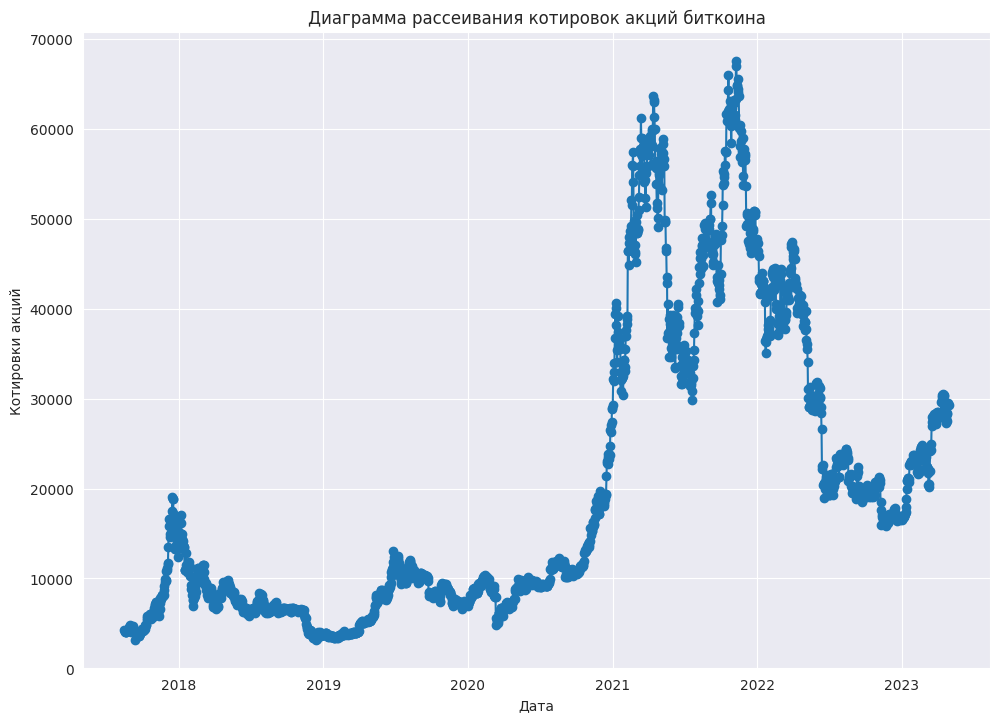

In [23]:
visualizer.plot_bitcoin_scatter()

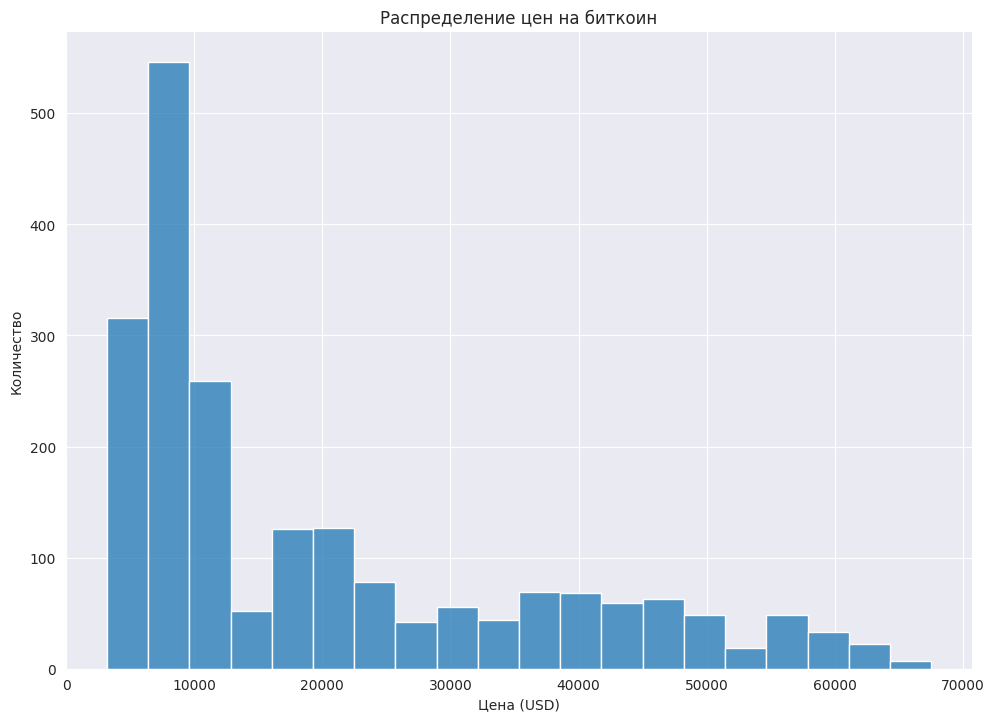

In [24]:
visualizer.plot_bitcoin_distribution()

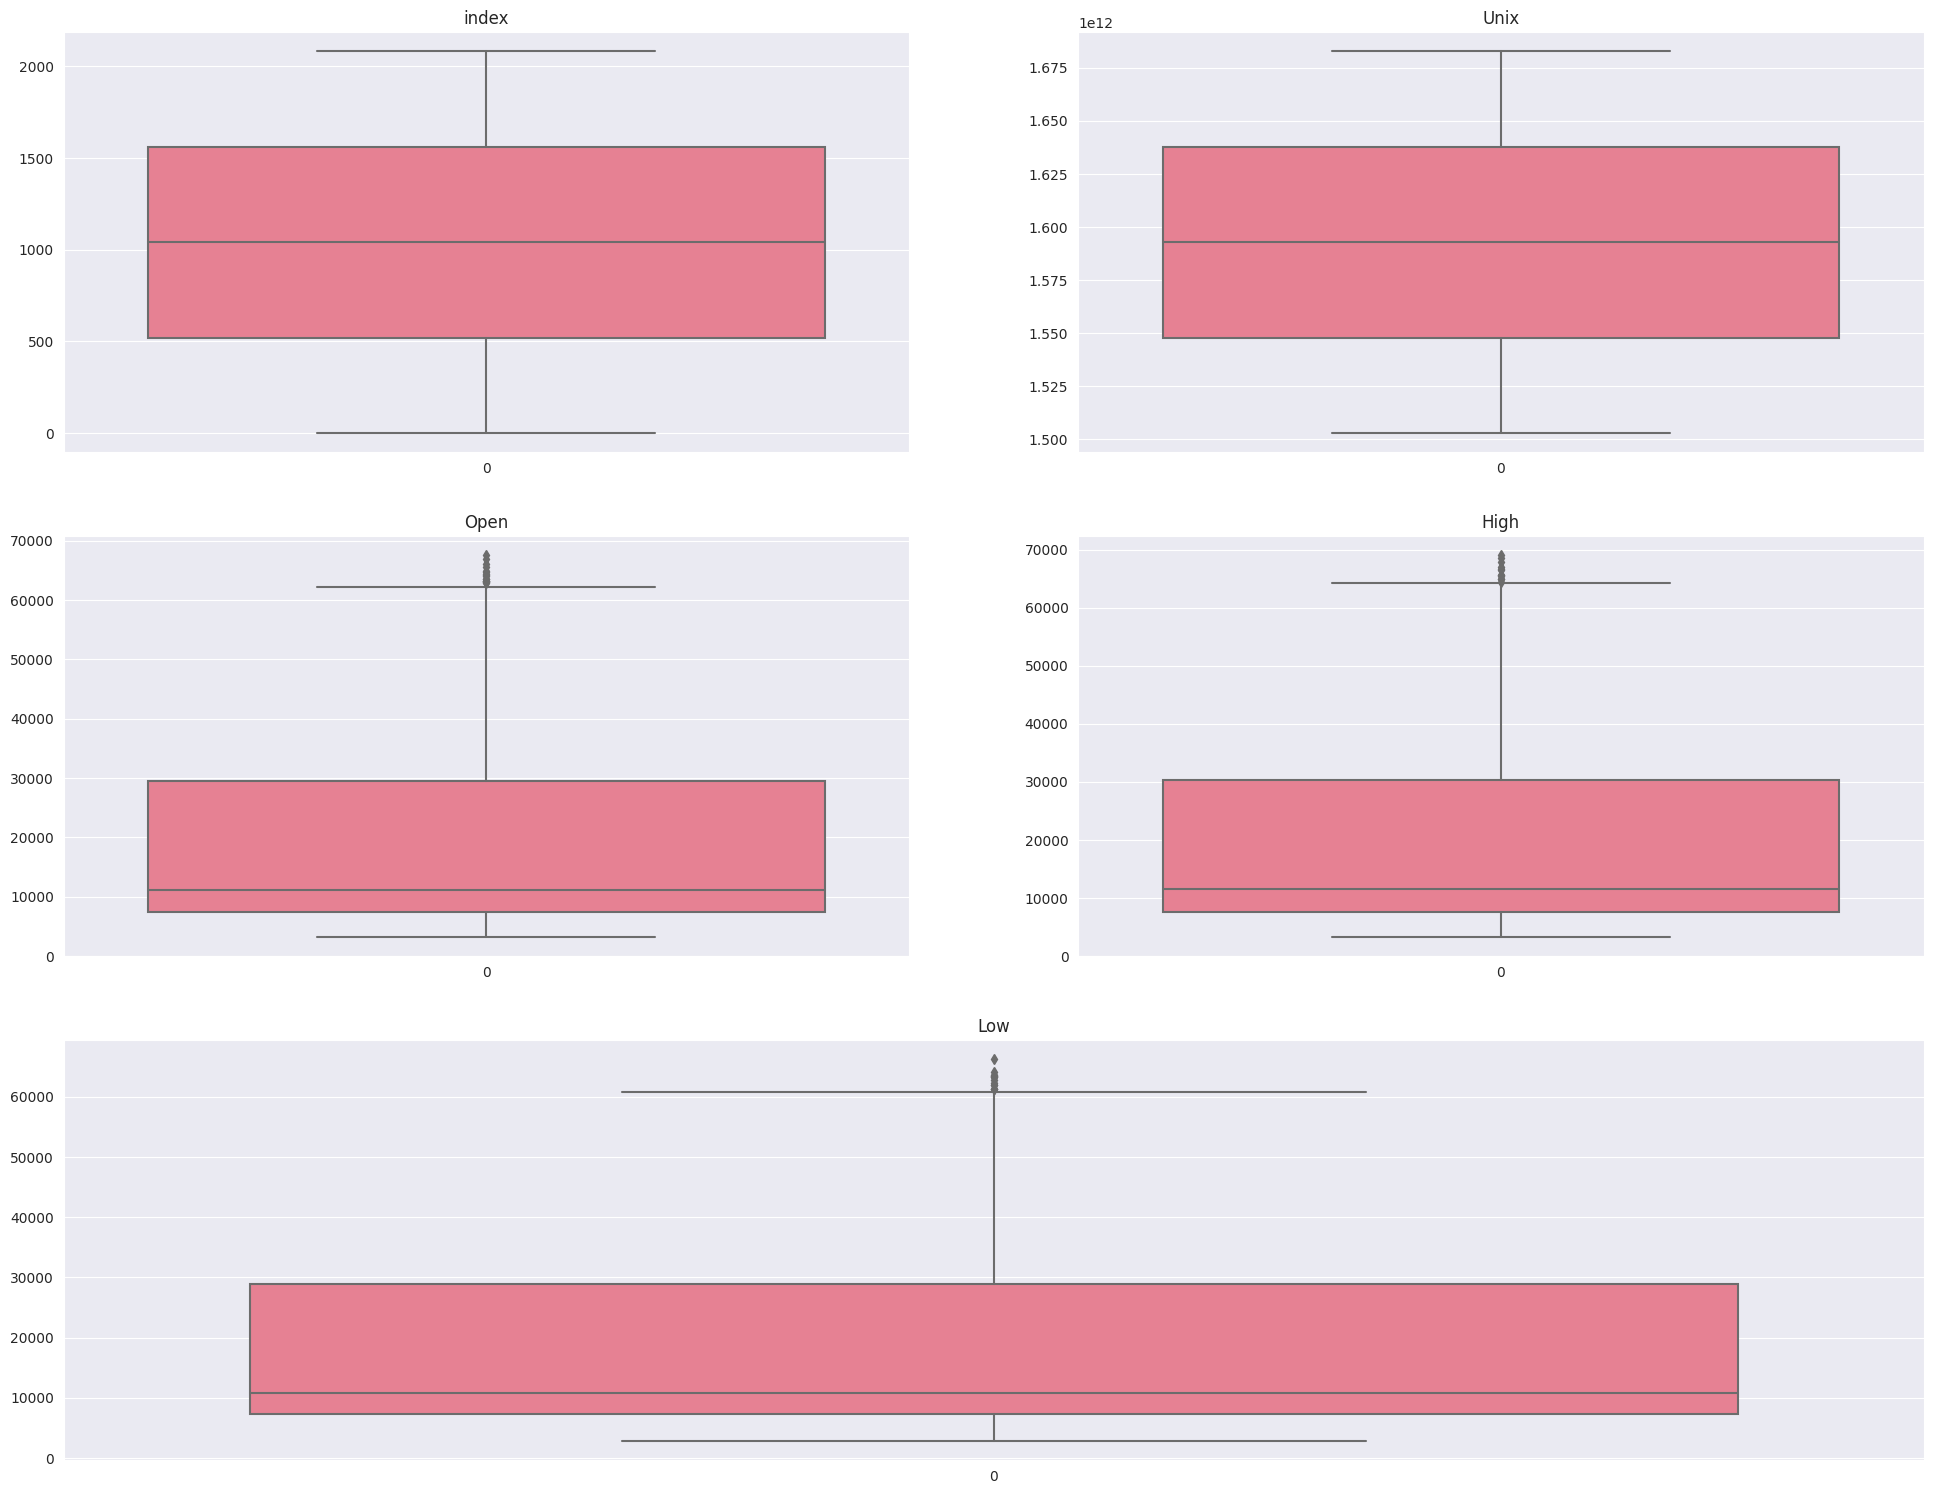

In [25]:
visualizer.plot_bitcoin_boxplot(nrows=3, ncols=2)

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

class BitcoinPricePreprocessor:
    
    def __init__(self, df):
        self.df = df
        
    def count_missing_values(self):
        missing_values = self.df.isna().sum().sum()
        print(f'Количество пропущенных значений: {missing_values}')
        
    def fill_missing_values(self, method='ffill'):
        self.df.fillna(method=method, inplace=True)
        
    def normalize_data(self):
        scaler = MinMaxScaler()
        self.df[['Open', 'High', 'Low', 'Close',' Volume BTC','	Volume USDT']] = scaler.fit_transform(self.df[['Open', 'High', 'Low', 'Close', 'Volume BTC','Volume USDT']])
        
    def preprocess_data(self):
        self.count_missing_values()
        self.fill_missing_values()
        self.normalize_data()
    
    def split_data(self, test_size=0.2):
        X = self.df.drop(columns=['Close'])
        y = self.df['Close']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
        return X_train, X_test, y_train, y_test


In [27]:
preprocessor = BitcoinPricePreprocessor(df)

# вызываем методы для предобработки данных
preprocessor.count_missing_values()
preprocessor.fill_missing_values()
preprocessor.normalize_data()
X_train, X_test, y_train, y_test = preprocessor.split_data()

Количество пропущенных значений: 0


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

class BitcoinDataAnalyzer:
    
    def __init__(self, df):
        self.df = df
    
    def test_stationarity(self):
        # Проверка на стационарность ряда с помощью теста Дики-Фуллера
        result = sm.tsa.stattools.adfuller(self.df['Close'])
        print('Тест Дики-Фуллера:')
        print('ADF статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        print('Критические значения:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
    
    def kendall_test(self):
        # Проверка на наличие тренда с помощью теста Манна-Кендалла
        result = stats.mstats.kendalltau(self.df['Close'], np.arange(len(self.df)))
        print('Тест Манна-Кендалла:')
        print('Значение статистики: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))

    
    def sen_estimator(self):
        # Оценка наклона тренда с помощью оценки Тейла-Сена
        x = np.arange(len(self.df))
        slope, intercept, lo_slope, up_slope = stats.theilslopes(self.df['Close'], x, alpha=0.05)
        print('Оценка Тейла-Сена:')
        print('Наклон: {}'.format(slope))
    
    def grubbs_test(self):
        # Проверка на наличие выбросов с помощью теста Граббса
        alpha = 0.05
        n = len(self.df)
        G_crit = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        G_max = np.max(np.abs((self.df['Close'] - np.mean(self.df['Close'])) / np.std(self.df['Close'])))
        if G_max > G_crit:
            print('Тест Граббса:')
            print('Найден выброс: {}'.format(G_max))
        else:
            print('Тест Граббса:')
            print('Выбросы не найдены')
    
    def shapiro_wilk_test(self):
        # Проверка на нормальность распределения с помощью теста Шапиро-Уилка
        result = stats.shapiro(self.df['Close'])
        print('Тест Шапиро-Уилка:')
        print('Статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))


In [29]:
analyzer = BitcoinDataAnalyzer(df)
analyzer.test_stationarity()
print('-'*70)
analyzer.kendall_test()
print('-'*70)
analyzer.sen_estimator()
print('-'*70)
analyzer.grubbs_test()
print('-'*70)
analyzer.shapiro_wilk_test()

Тест Дики-Фуллера:
ADF статистика: -1.5202658510425417
p-value: 0.5234633571379188
Критические значения:
	1%: -3.433533023432548
	5%: -2.8629461097716633
	10%: -2.567518549139982
----------------------------------------------------------------------
Тест Манна-Кендалла:
Значение статистики: 0.5012046924728031
p-value: 1.8292761188950186e-257
----------------------------------------------------------------------
Оценка Тейла-Сена:
Наклон: 0.0001781616778108604
----------------------------------------------------------------------
Тест Граббса:
Выбросы не найдены
----------------------------------------------------------------------
Тест Шапиро-Уилка:
Статистика: 0.8325648307800293
p-value: 2.920305999652919e-42


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

class ARIMAModel:
    
    def __init__(self, df):
        self.df = df
    
    def select_order(self, p_range, d_range, q_range):
        best_aic = np.inf
        best_order = None
        for p in p_range:
            for d in d_range:
                for q in q_range:
                    try:
                        model = ARIMA(self.df['Close'], order=(p, d, q)).fit()
                        aic = model.aic
                        if aic < best_aic:
                            best_aic = aic
                            best_order = (p, d, q)
                    except:
                        continue
        print('Выбраны гиперпараметры:', best_order)
        return best_order
    
    def train_model(self, order):
        model = ARIMA(self.df['Close'], order=order).fit()
        print(model.summary())
        return model
    
    def plot_residuals(self, model):
        residuals = model.resid
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        residuals.plot(title='Остатки', ax=ax[0])
        residuals.plot(kind='kde', title='Плотность остатков', ax=ax[1])
        plt.show()
        
    def plot_predictions(self, model, days):
        y_true = self.df['Close'].values
        y_pred = model.predict(start=0, end=len(self.df)+days-1)
        
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(y_true, label='Исходные данные')
        ax.plot(y_pred, label='Прогноз')
        ax.axvline(len(self.df)-1, color='gray', ls='--')
        ax.legend()
        plt.show()
        
    def evaluate_model(self, model):
        residuals = model.resid
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(residuals)
        ax.set(title='Остатки', ylabel='Ошибка')
        plt.show()

    def evaluate_metrics(self, model):
        y_true = self.df['Close'].values
        y_pred = model.predict()
        mae = np.mean(np.abs(y_true - y_pred))
        mse = np.mean(np.square(y_true - y_pred))
        return {'MAE': mae, 'MSE': mse}
    def train(self, p_range, d_range, q_range, days):
        order = self.select_order(p_range, d_range, q_range)
        model = self.train_model(order)
        self.plot_residuals(model)
        self.evaluate_model(model)
        
        # Выводим график изменения MSE со временем
        y_true = self.df['Close'].values
        y_pred = model.predict()
        mse_values = [np.mean(np.square(y_true[:i+1] - y_pred[:i+1])) for i in range(len(y_true))]
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(mse_values)
        ax.set(title='Изменение MSE со временем', ylabel='MSE')
        plt.show()
        
        self.plot_predictions(model, days)
        metrics = self.evaluate_metrics(model)
        print('Метрики модели:')
        for metric, value in metrics.items():
            print(f'{metric}: {value:.4f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Выбраны гиперпараметры: (1, 1, 0)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2082
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5760.761
Date:                Sun, 30 Apr 2023   AIC                         -11517.522
Time:                        22:16:47   BIC                         -11506.241
Sample:                             0   HQIC                        -11513.388
                               - 2082                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0315      0.014     -2.268      0.023      -0.059      -0.004
sigma2         0.0002   2.93e-06     78.683      0.000       0.000       0.000
Ljung-Box (L1) (Q)

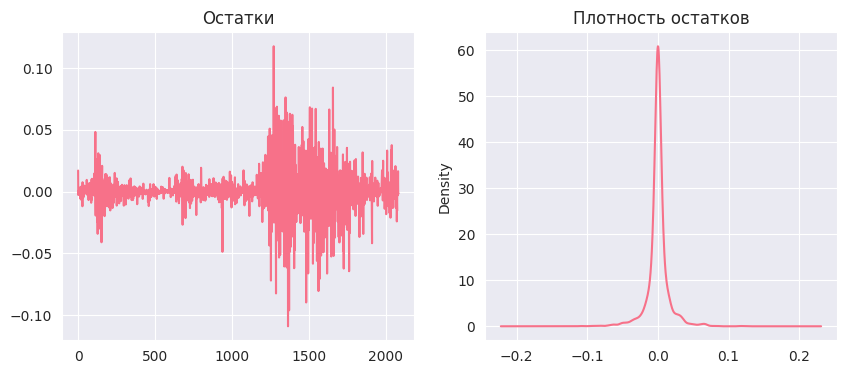

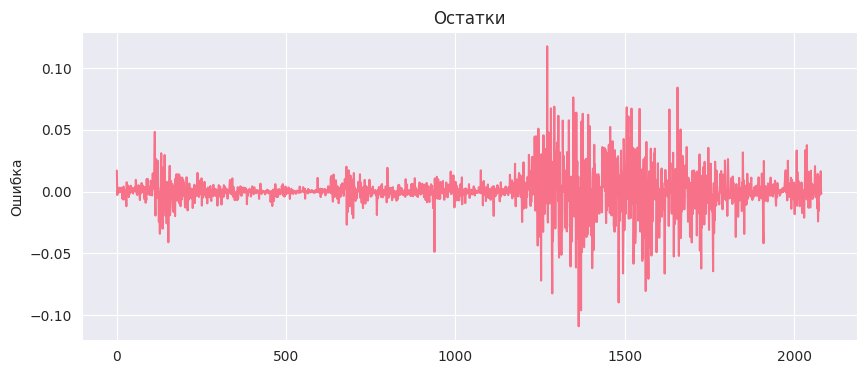

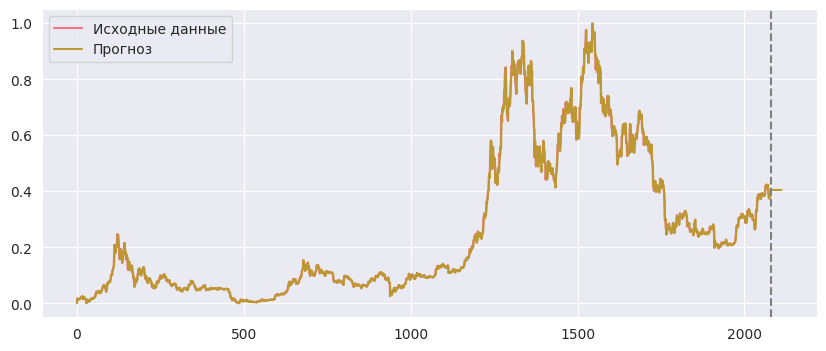

Метрики модели:
MAE: 0.0084
MSE: 0.0002


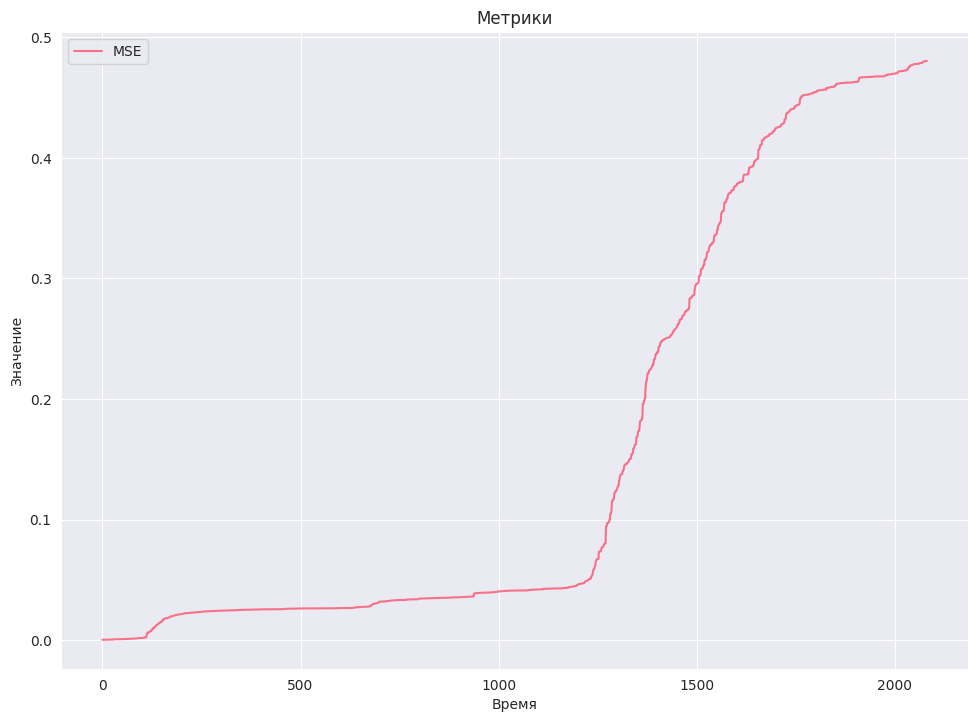

In [31]:
arima_model = ARIMAModel(df)
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)
days = 30

order = arima_model.select_order(p_range, d_range, q_range)
model = arima_model.train_model(order)
arima_model.plot_residuals(model)
arima_model.evaluate_model(model)
arima_model.plot_predictions(model, days)
metrics = arima_model.evaluate_metrics(model)

print('Метрики модели:')
for metric, value in metrics.items():
    print(f'{metric}: {value:.4f}')

fig, ax = plt.subplots()
ax.plot(model.resid.index, model.resid.apply(lambda x: x ** 2).cumsum(), label='MSE')
#ax.plot(model.resid.index, sm.r2_score(arima_model.df['Close'], model.predict()) * np.ones(len(arima_model.df)), label='R2')
ax.set(title='Метрики', xlabel='Время', ylabel='Значение')
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

Выбраны гиперпараметры: (1, 1, 0)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2082
Model:                 ARIMA(1, 1, 0)   Log Likelihood                5760.761
Date:                Sun, 30 Apr 2023   AIC                         -11517.522
Time:                        22:17:13   BIC                         -11506.241
Sample:                             0   HQIC                        -11513.388
                               - 2082                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0315      0.014     -2.268      0.023      -0.059      -0.004
sigma2         0.0002   2.93e-06     78.683      0.000       0.000       0.000
Ljung-Box (L1) (Q)

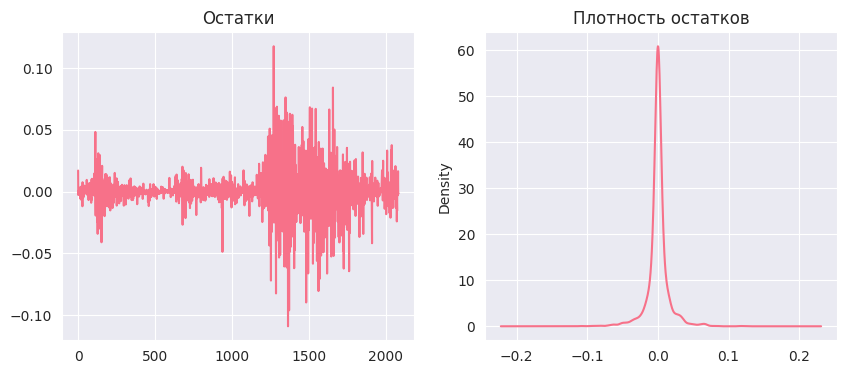

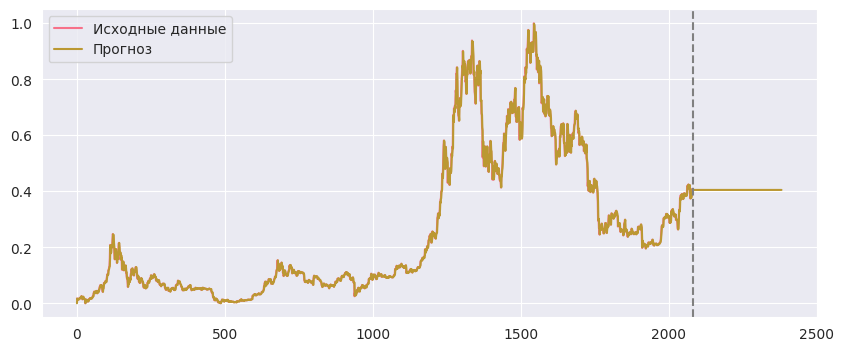

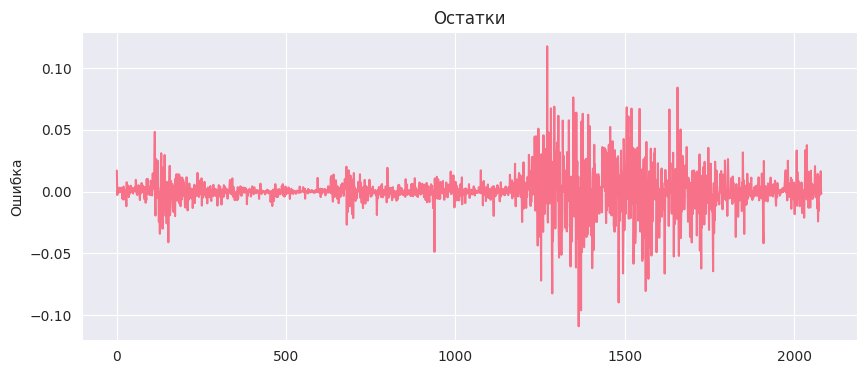

In [32]:
model = ARIMAModel(df)
# Выбор гиперпараметров модели
order = model.select_order(range(3), range(3), range(3))

# Обучение модели
fitted_model = model.train_model(order)

# Построение графиков остатков и прогноза
model.plot_residuals(fitted_model)
model.plot_predictions(fitted_model, days=300)

# Оценка качества модели
model.evaluate_model(fitted_model)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

class BitcoinPriceLSTM:
    
    def __init__(self, df, sequence_length=30, train_test_split=0.8, epochs=50, batch_size=32):
        self.df = df
        self.sequence_length = sequence_length
        self.train_test_split = train_test_split
        self.epochs = epochs
        self.batch_size = batch_size
        
        self.preprocessor = BitcoinPricePreprocessor(self.df)
        self.preprocessor.preprocess_data()
        
        self.X, self.y = self.generate_X_y()
        self.X_train, self.X_test, self.y_train, self.y_test = self.train_test_split_data()
        self.model = self.build_model()

    def generate_X_y(self):
        X, y = [], []
        for i in range(len(self.df) - self.sequence_length):
            X.append(self.df.iloc[i:i + self.sequence_length][['Open', 'High', 'Low', 'Close',' Volume BTC']].values)
            y.append(self.df.iloc[i + self.sequence_length]['Close'])
        return np.array(X), np.array(y)

    def train_test_split_data(self):
        split_index = int(self.train_test_split * len(self.X))
        X_train, X_test = self.X[:split_index], self.X[split_index:]
        y_train, y_test = self.y[:split_index], self.y[split_index:]
        return X_train, X_test, y_train, y_test

    def build_model(self):
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(self.X_train.shape[1], 5)))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(units=50))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    def train(self):
        history = self.model.fit(self.X_train, self.y_train, epochs=self.epochs, batch_size=self.batch_size, validation_data=(self.X_test, self.y_test), verbose=2, shuffle=False)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

    def predict(self, days=1):
        last_sequence = self.X[-1]
        predicted_prices = []
        for _ in range(days):
            predicted_price = self.model.predict(last_sequence.reshape(1, self.sequence_length, 5))[0, 0]
            predicted_prices.append(predicted_price)
            last_sequence = np.append(last_sequence[1:], predicted_price).reshape(self.sequence_length, 5)
        return predicted_prices




Количество пропущенных значений: 0
Epoch 1/50
52/52 - 13s - loss: 0.0122 - val_loss: 0.0136 - 13s/epoch - 244ms/step
Epoch 2/50
52/52 - 0s - loss: 0.0130 - val_loss: 0.0027 - 434ms/epoch - 8ms/step
Epoch 3/50
52/52 - 0s - loss: 0.0137 - val_loss: 0.0076 - 473ms/epoch - 9ms/step
Epoch 4/50
52/52 - 0s - loss: 0.0223 - val_loss: 0.0212 - 440ms/epoch - 8ms/step
Epoch 5/50
52/52 - 0s - loss: 0.0224 - val_loss: 0.0278 - 442ms/epoch - 8ms/step
Epoch 6/50
52/52 - 0s - loss: 0.0251 - val_loss: 0.0865 - 444ms/epoch - 9ms/step
Epoch 7/50
52/52 - 0s - loss: 0.0201 - val_loss: 0.0583 - 440ms/epoch - 8ms/step
Epoch 8/50
52/52 - 0s - loss: 0.0088 - val_loss: 0.0302 - 444ms/epoch - 9ms/step
Epoch 9/50
52/52 - 0s - loss: 0.0042 - val_loss: 0.0095 - 457ms/epoch - 9ms/step
Epoch 10/50
52/52 - 0s - loss: 0.0038 - val_loss: 0.0069 - 440ms/epoch - 8ms/step
Epoch 11/50
52/52 - 0s - loss: 0.0041 - val_loss: 0.0097 - 457ms/epoch - 9ms/step
Epoch 12/50
52/52 - 0s - loss: 0.0047 - val_loss: 0.0137 - 449ms/epoch 

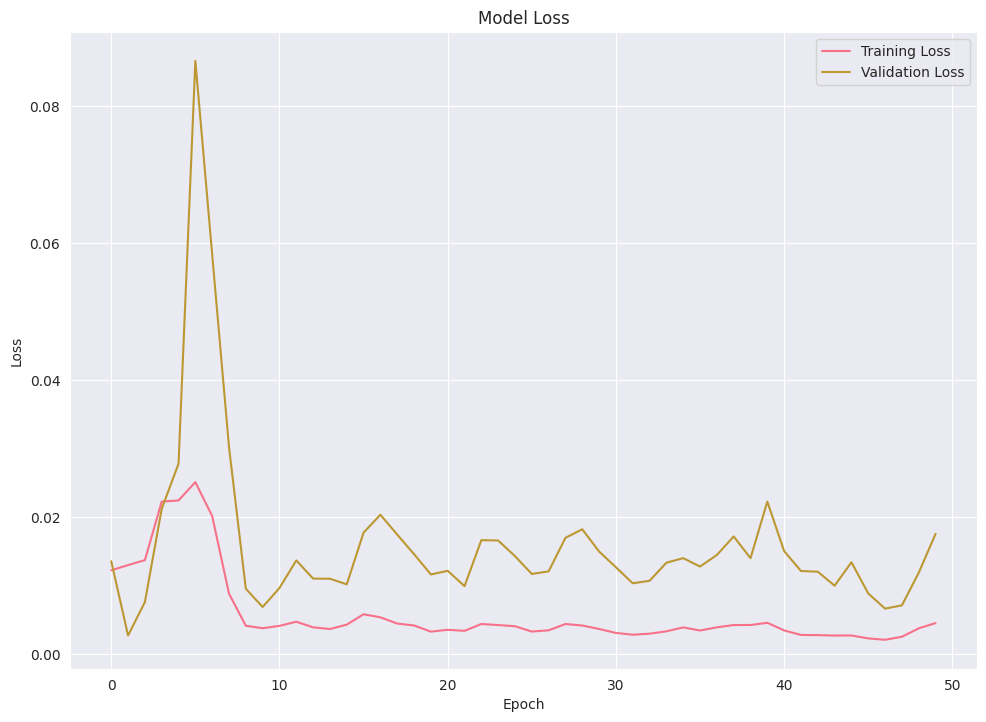

In [34]:
model = BitcoinPriceLSTM(df)
model.train()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


class SARIMAXModel:
    def __init__(self, data, order, seasonal_order, forecast_periods):
        self.data = data
        self.order = order
        self.seasonal_order = seasonal_order
        self.forecast_periods = forecast_periods
        self.model = None

    def fit(self):
        self.model = SARIMAX(self.data, order=self.order, seasonal_order=self.seasonal_order)
        self.results = self.model.fit()
        print(self.results.summary())

    def forecast(self):
        forecast = self.results.get_forecast(steps=self.forecast_periods)
        mean_forecast = forecast.predicted_mean
        ci_forecast = forecast.conf_int()
        ci_forecast['mean'] = mean_forecast
        return ci_forecast

    def plot_forecast(self):
        ci_forecast = self.forecast()
        plt.plot(self.data, label='Actual')
        plt.plot(ci_forecast['mean'], label='Forecast')
        plt.fill_between(ci_forecast.index, ci_forecast.iloc[:, 0], ci_forecast.iloc[:, 1], alpha=0.2)
        plt.legend()
        plt.show()

    def plot_residuals(self):
        residuals = self.results.resid
        plt.plot(residuals)
        plt.title('Residuals')
        plt.show()

    def plot_acf_pacf(self):
        fig, ax = plt.subplots(2, figsize=(10, 6))
        fig = plot_acf(self.results.resid, lags=20, ax=ax[0])
        fig = plot_pacf(self.results.resid, lags=20, ax=ax[1])
        plt.show()

    def plot_error_reduction(self):
        train_data = self.data[:-self.forecast_periods]
        test_data = self.data[-self.forecast_periods:]
        error = []
        for i in range(1, 13):
            model = SARIMAX(train_data, order=self.order, seasonal_order=self.seasonal_order)
            results = model.fit()
            forecast = results.forecast(steps=self.forecast_periods)
            error.append(np.mean(np.abs(test_data - forecast)))
            train_data = self.data[:-self.forecast_periods + i]
        plt.plot(range(1, 13), error)
        plt.title('MAE vs Training Set Size')
        plt.xlabel('Training Set Size')
        plt.ylabel('MAE')
        plt.show()

    def evaluate_model(self):
        ci_forecast = self.forecast()
        test_data = self.data[-self.forecast_periods:]
        mae = np.mean(np.abs(test_data - ci_forecast['mean']))
        print('Mean Absolute Error (MAE):', mae)
    def forecast(self):
        forecast = self.results.get_forecast(steps=self.forecast_periods)
        mean_forecast = forecast.predicted_mean
        ci_forecast = forecast.conf_int()
        ci_forecast['mean'] = mean_forecast
        forecast_dates = pd.date_range(self.data.index[-1], periods=self.forecast_periods + 1, freq='D')[1:]
        forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': mean_forecast.values})
        return forecast_df

In [36]:
order = (2, 1, 2)
seasonal_order = (1, 1, 1, 12)
model = SARIMAXModel(df['Close'], order, seasonal_order, 240)

# Обучим модель и выведем ее статистические характеристики
model.fit()



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2082
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                5698.428
Date:                              Sun, 30 Apr 2023   AIC                         -11382.855
Time:                                      22:18:05   BIC                         -11343.411
Sample:                                           0   HQIC                        -11368.397
                                             - 2082                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4533      0.373      1.214      0.225      -0.279       1.185
ar.L2          0.38

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


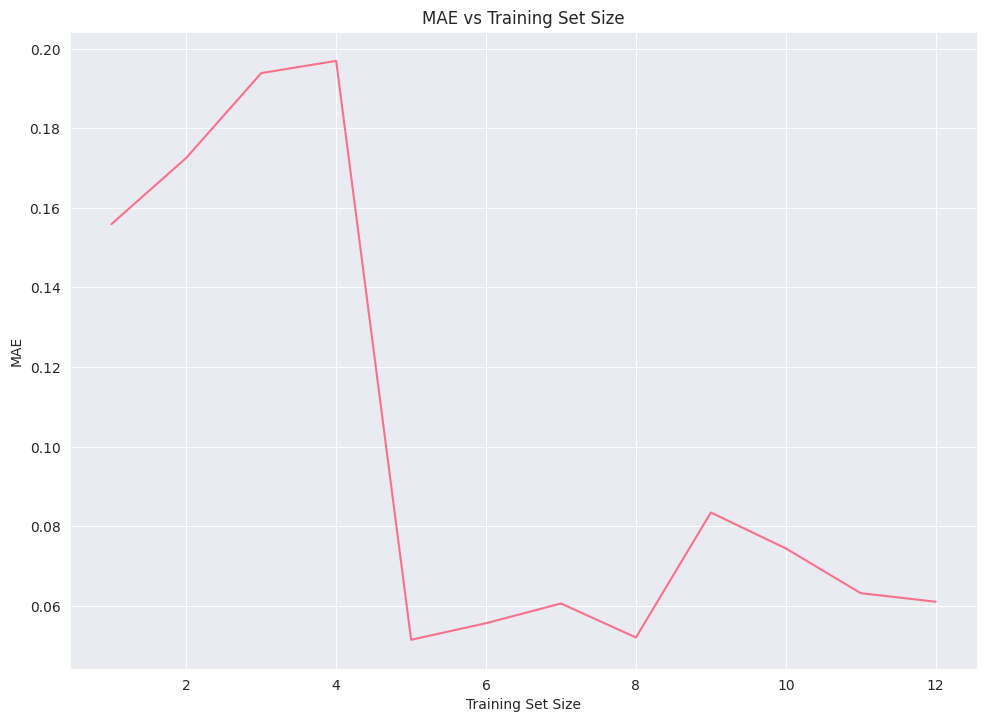

In [37]:
# Выведем график уменьшения ошибки
model.plot_error_reduction()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


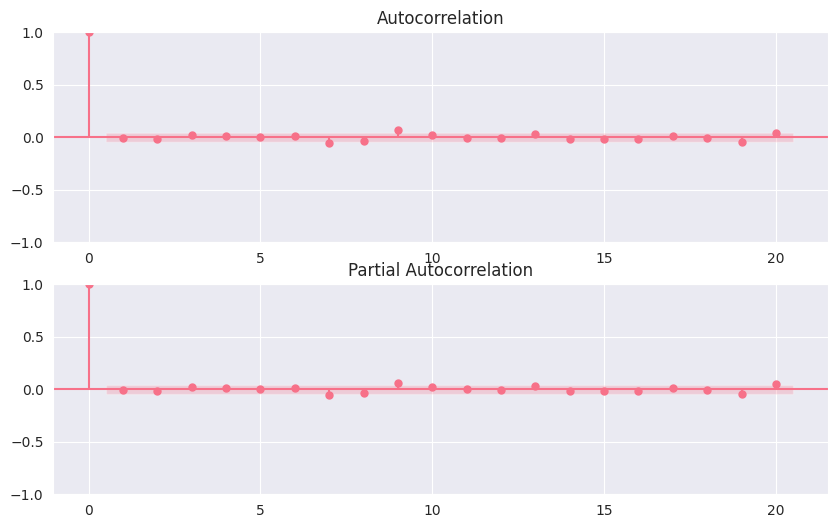

In [38]:

# Выведем графики ACF и PACF для остатков модели
model.plot_acf_pacf()



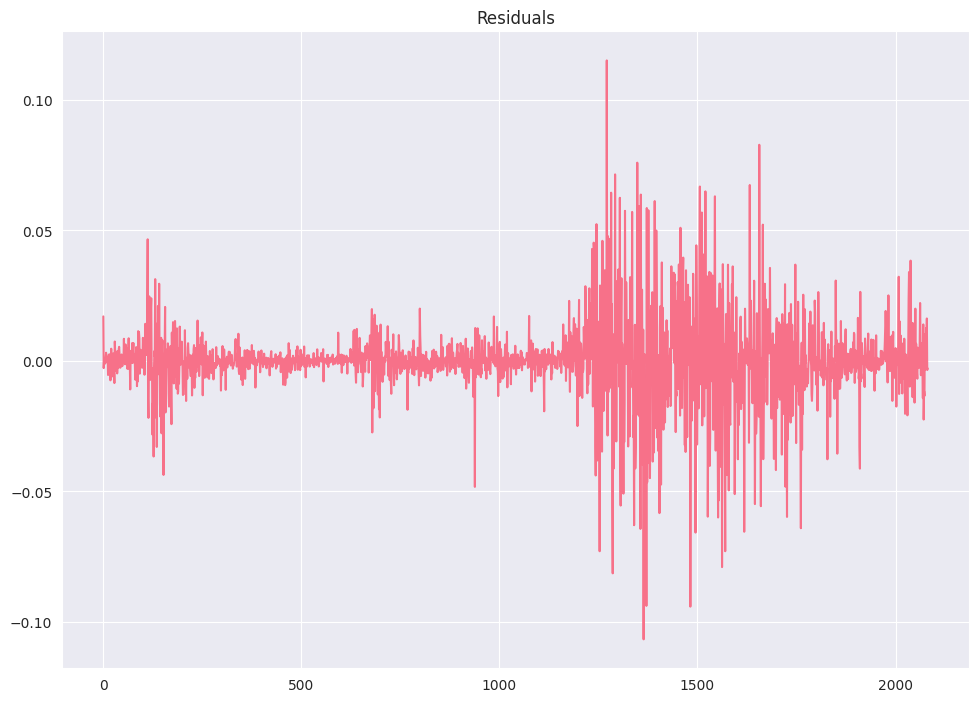

In [39]:
# Выведем график остатков модели
model.plot_residuals()


In [40]:
forecast = model.forecast()
print(forecast)

                             Date  Forecast
0   1970-01-02 00:00:00.000002081  0.404255
1   1970-01-03 00:00:00.000002081  0.403769
2   1970-01-04 00:00:00.000002081  0.406434
3   1970-01-05 00:00:00.000002081  0.406108
4   1970-01-06 00:00:00.000002081  0.405228
..                            ...       ...
235 1970-08-25 00:00:00.000002081  0.447041
236 1970-08-26 00:00:00.000002081  0.446931
237 1970-08-27 00:00:00.000002081  0.446998
238 1970-08-28 00:00:00.000002081  0.448214
239 1970-08-29 00:00:00.000002081  0.448545

[240 rows x 2 columns]


In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import TimeDistributed
from keras.layers import concatenate
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt

class BitcoinPricePredictor:
    
    def __init__(self, train_data, test_data):
        self.train_data = train_data
        self.test_data = test_data
        
    def prepare_data(self, timesteps=30):
        # Normalize the data
        scaler = MinMaxScaler()
        self.train_data = scaler.fit_transform(self.train_data)
        self.test_data = scaler.transform(self.test_data)
        
        # Create input and output sequences
        def create_sequences(data, timesteps):
            X, y = [], []
            for i in range(len(data)-timesteps):
                X.append(data[i:i+timesteps, :])
                y.append(data[i+timesteps, 0])
            X = np.array(X)
            y = np.array(y)
            return X, y
        
        self.X_train, self.y_train = create_sequences(self.train_data, timesteps)
        self.X_test, self.y_test = create_sequences(self.test_data, timesteps)
        
    def build_model(self, timesteps=30, input_dim=1, n_outputs=1, n_hidden=128, n_layers=2):
        # Define the LSTM model
        model = Sequential()
        for i in range(n_layers):
            model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim)))
        model.add(TimeDistributed(Dense(n_outputs)))
        model.add(LSTM(n_hidden))
        model.add(Dense(n_outputs))
        
        # Compile the model
        model.compile(loss='mean_squared_error', optimizer='adam')
        
        self.model = model
        
    def fit_model(self, epochs=50, batch_size=64, early_stop_patience=10, verbose=1):
        # Define early stopping callback
        early_stop = EarlyStopping(monitor='val_loss', patience=early_stop_patience, verbose=verbose, mode='min')
        
        # Fit the model
        history = self.model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size, verbose=verbose, 
                                 validation_data=(self.X_test, self.y_test), callbacks=[early_stop])
        
        self.history = history
        
    def evaluate_model(self):
        # Make predictions on test data
        y_pred = self.model.predict(self.X_test)
        y_pred = y_pred.reshape(y_pred.shape[0], -1)
        y_test = self.y_test.reshape(-1, 1)
        
        # Calculate evaluation metrics
        rmse = np.sqrt(np.mean(np.square(y_pred - y_test)))
        mse = np.mean(np.square(y_pred - y_test))
        mae = np.mean(np.abs(y_pred - y_test))
        
        print('RMSE:', rmse)
        print('MSE:', mse)
        print('MAE:', mae)
        
        # Plot loss and validation loss during training
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
    def plot_predictions(self):
        # Make predictions on test data
        y_pred = self.model.predict(self.X_test)
        y_pred = y_pred.reshape(y_pred.shape[0], -1)
        y_test = self.y_test.reshape(-1, 1)
        
        # Plot predicted and true values
        plt.plot(y_test, label='True Values')
        plt.plot(y_pred, label='Predicted Values')
        plt.legend()
        plt.show()
        
    def plot_loss(self):
        # Plot loss and validation loss during training
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.legend()
        plt.show()


Epoch 1/50
27/27 [==============================] - 9s 66ms/step - loss: 0.0444 - val_loss: 0.0039
Epoch 2/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 3/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 4/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 5/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 7/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 8/50
27/27 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 9.8047e-04
Epoch 9/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 8.7146e-04
Epoch 10/50
27/27 [==============================] - 0s 9ms/step - loss: 0.0015 - val_loss: 8.6201e-04


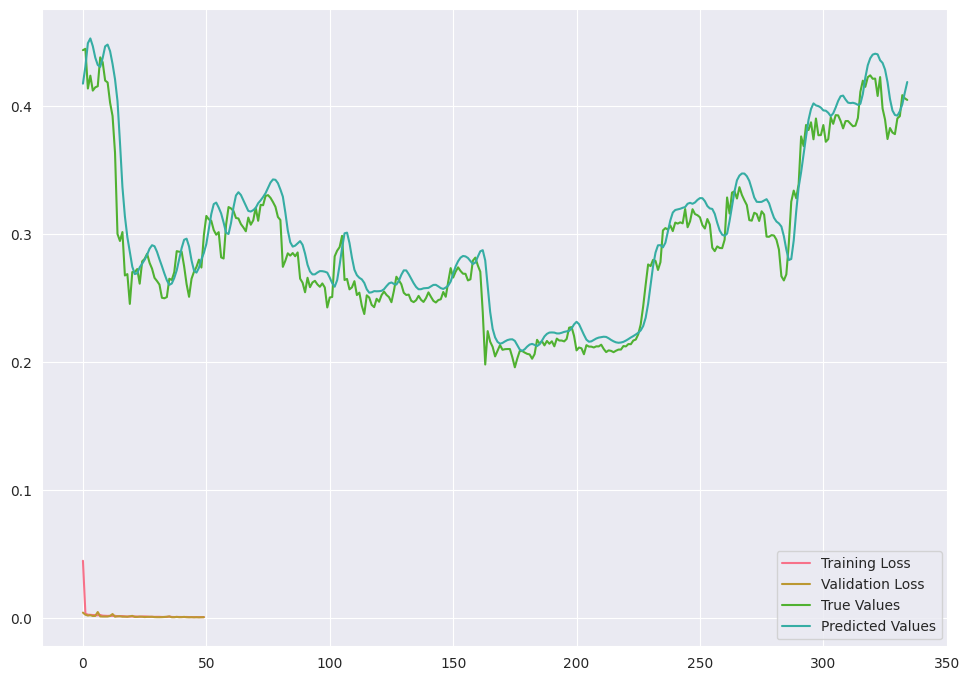

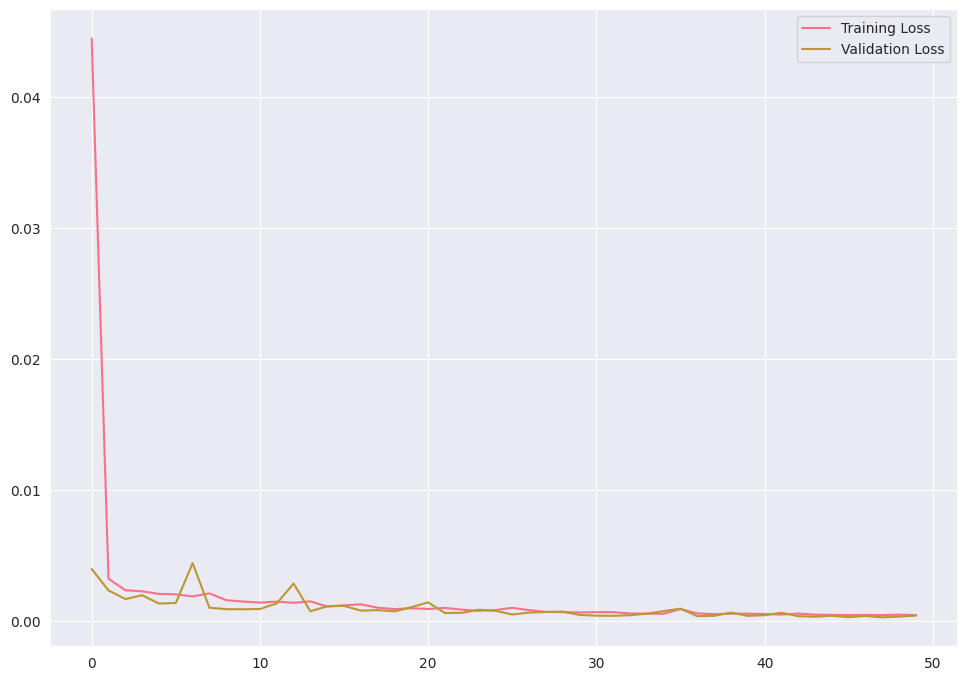

In [45]:
data = df['Close'].values.reshape(-1, 1)
train_data = data[:-365]
test_data = data[-365:]

# Initialize the model
model = BitcoinPricePredictor(train_data, test_data)

# Prepare the data
model.prepare_data()

# Build the model
model.build_model()

# Fit the model
model.fit_model()

# Evaluate the model
model.evaluate_model()

# Plot the predicted values
model.plot_predictions()

# Plot the loss during training
model.plot_loss()